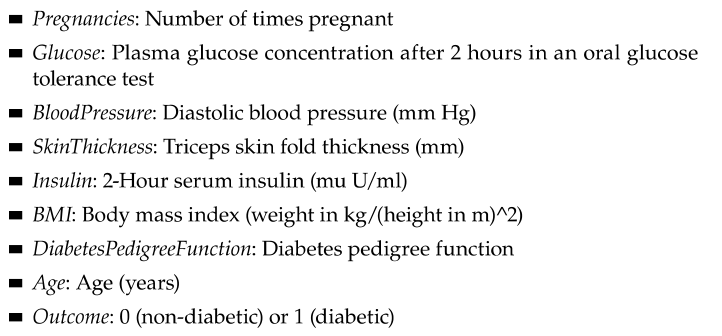

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\aslan\OneDrive\Masaüstü\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Veri setinde 768 satır var ve 9 özellik var.

In [4]:
# veri setinde eksik veri var mı
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Eksik veri yok.

In [5]:
# Sıfır değerini içeren verilere bakalım. 
# Hamile kalma sayısı ile çıktı değişkeninin 0 olması normal bir durum. 
# Ancak diğer özelliklerde 0 olması o özelliğin ölçülmediği anlamına gelir.
df.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [6]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.nan)


In [7]:
df.fillna(df.mean(),inplace=True)

In [8]:
df.eq(0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


In [10]:
import seaborn as sns

<Axes: >

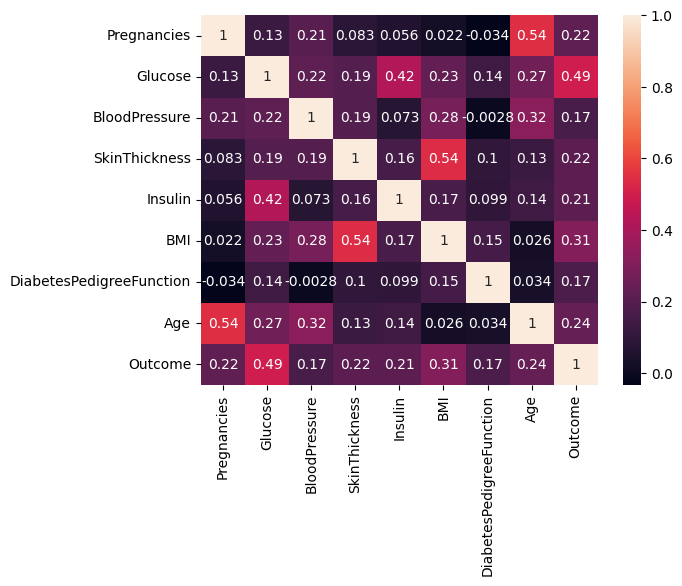

In [11]:
sns.heatmap(df.corr(), annot=True)

In [12]:
# en yüksek korelasyona sahip 4 özellik
df.corr().nlargest(4,'Outcome').index

Index(['Outcome', 'Glucose', 'BMI', 'Age'], dtype='object')

In [13]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
X = df[['Glucose','BMI','Age']]
y=df.iloc[:,8]

In [14]:
log_reg = linear_model.LogisticRegression()
log_reg_score = cross_val_score(log_reg,X,y,cv=10,scoring='accuracy').mean()

In [15]:
log_reg_score

np.float64(0.7669856459330144)

In [16]:
result=[]
result.append(log_reg_score)

In [17]:
from sklearn import svm


In [18]:
linear_svm = svm.SVC(kernel='linear')

In [19]:
linear_svm_score = cross_val_score(linear_svm,X,y,cv=10,scoring='accuracy').mean()

In [20]:
linear_svm_score

np.float64(0.7656527682843473)

In [21]:
import pickle

In [22]:
filename='diabets'

In [23]:
log_reg.fit(X,y)

pickle.dump(log_reg,open(filename,'wb'))



In [24]:
loaded_model = pickle.load(open(filename,'rb'))

In [25]:
Glucose = 55
BMI = 60
Age = 20
prediction = loaded_model.predict([[Glucose,BMI,Age]])

c:\Users\aslan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [26]:
prediction

array([0])